Création d'une base de  données

<ipython-input-1-dbe3d754b380>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


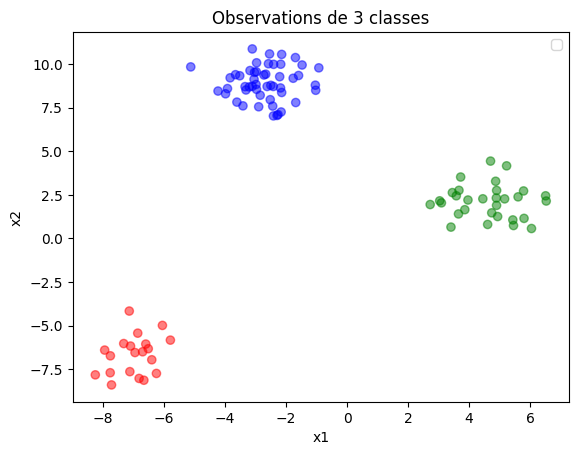

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

n_samples = [50, 30, 20]

X, y = make_blobs(n_samples=n_samples, centers=None, n_features=2, random_state=42)

colors = ['blue', 'green', 'red']
cm = ListedColormap(colors)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Observations de 3 classes")
plt.legend()
plt.show()


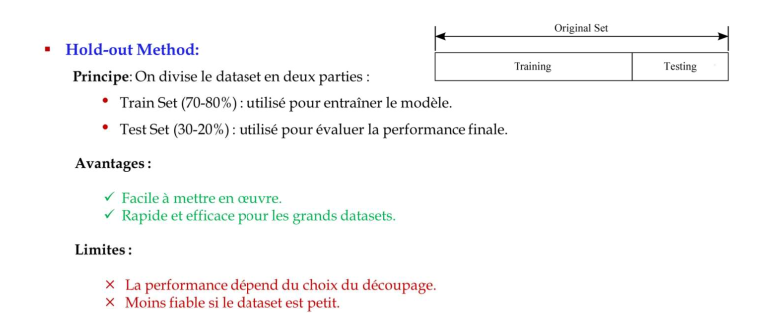

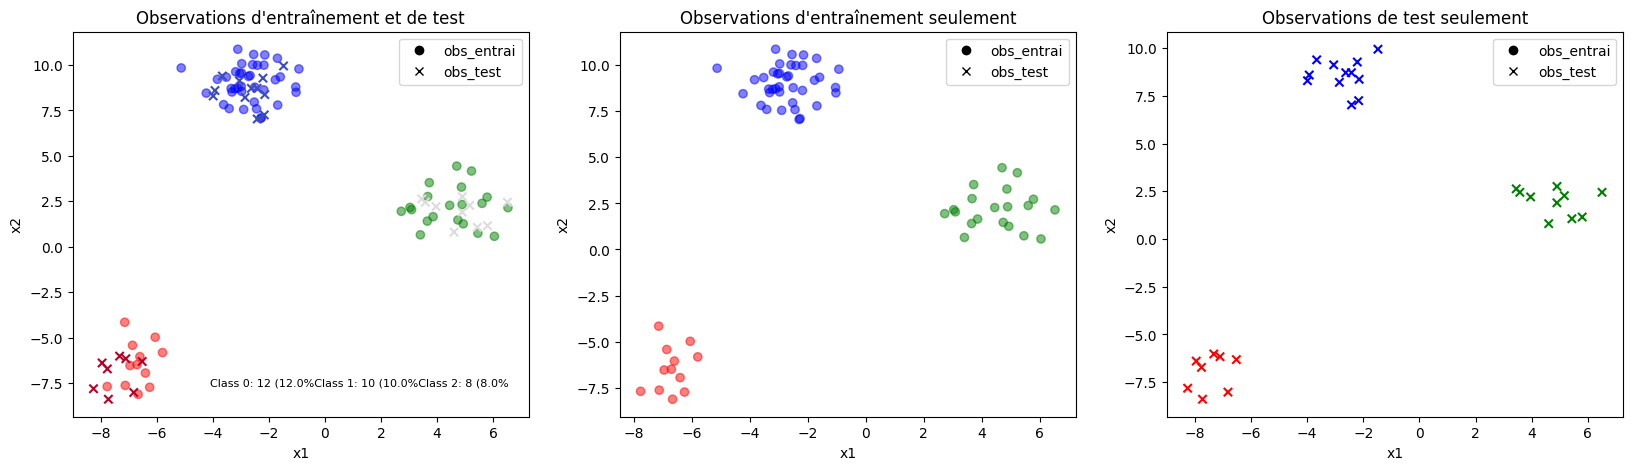

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import matplotlib.lines as mlines
# Créer une figure avec trois sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Définition des légendes personnalisées
blue_circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label="obs_entrai")
blue_square = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label="obs_test")

# Afficher la légende avec les handles personnalisés
plt.legend(handles=[blue_circle, blue_square])

# Visualiser les deux sous-ensembles (X_train et X_test)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, label="obs_entrai", cmap=cm, alpha=0.5)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, label="obs_test", cmap=plt.cm.coolwarm, marker="x")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].set_title("Observations d'entraînement et de test")
axes[0].legend(handles=[blue_circle, blue_square])

# Compter le nombre d'observations test pour chaque classe
unique_classes, class_counts = np.unique(y_test, return_counts=True)
class_info = ""

for cls, count in zip(unique_classes, class_counts):
    class_info += f"Class {cls}: {count} ({100 * count / len(y[:]==cls)}%" #add class and count to string

axes[0].text(0.3, 0.1, class_info, transform=axes[0].transAxes, verticalalignment='top', fontsize=8)

# Visualiser seulement X_train
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, label="obs_entrai", cmap=cm, alpha=0.5)
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].set_title("Observations d'entraînement seulement")
axes[1].legend(handles=[blue_circle, blue_square])

# Visualiser seulement X_test
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, label="obs_test", cmap=cm, marker="x")
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")
axes[2].set_title("Observations de test seulement")
axes[2].legend(handles=[blue_circle, blue_square])
# Afficher la figure
plt.show()

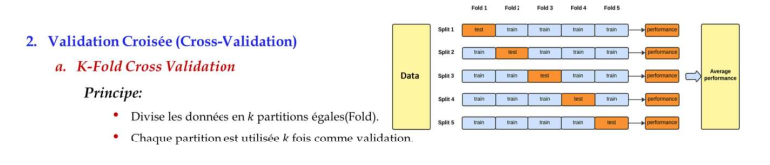

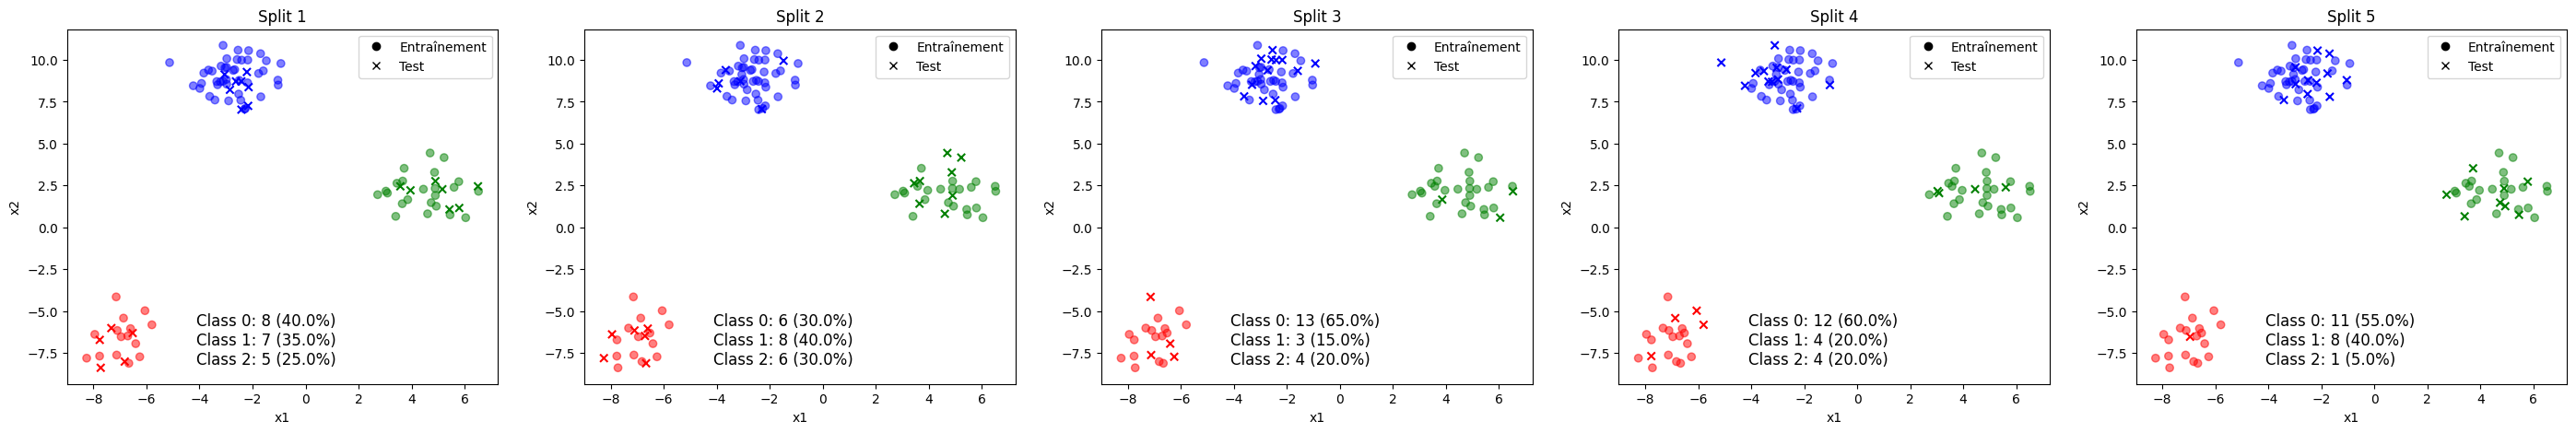

In [9]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

k_folds = 5
fig, axes = plt.subplots(1, k_folds, figsize=(35, 5))

# Créer un objet KFold avec 5 plis
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Définition des légendes personnalisées
blue_circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label="Entraînement")
blue_square = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label="Test")

# Parcourir les plis et visualiser les données d'entraînement et de test
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]

    # Afficher les données d'entraînement en bleu
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y[train_index], label='Entraînement', cmap=cm, alpha=0.5)

    # Afficher les données de test en rouge
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y[test_index], label='Test', marker='x', cmap=cm)

    axes[i].set_xlabel("x1")
    axes[i].set_ylabel("x2")
    axes[i].set_title("Split " + str(i + 1))
    axes[i].legend(handles=[blue_circle, blue_square])

    # Compter le nombre d'observations test pour chaque classe
    unique_classes, class_counts = np.unique(y[test_index], return_counts=True)
    class_info = ""

    for cls, count in zip(unique_classes, class_counts):
        class_info += f"Class {cls}: {count} ({100 * count / len(y[test_index]):.1f}%)\n"

    axes[i].text(0.3, 0.2, class_info, transform=axes[i].transAxes, verticalalignment='top', fontsize=12)

plt.show()


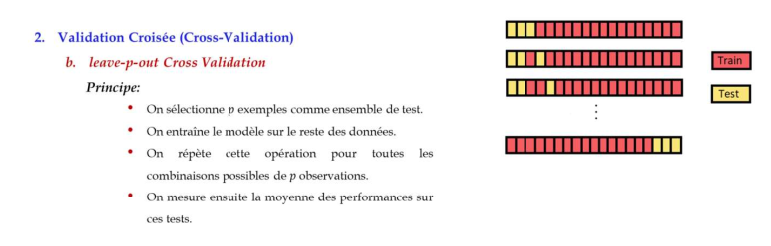

4950


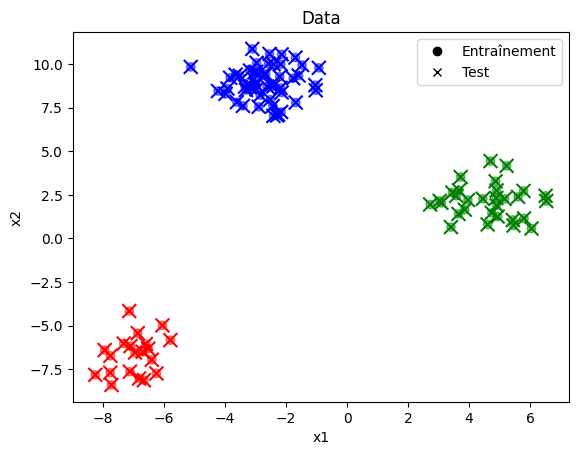

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeavePOut

fig, ax = plt.subplots()

# Création d'un objet LeaveOneOut
loo = LeavePOut(p=2)
scat1 = ax.scatter(X[:, 0], X[:, 1], c=y, label='Entrainement', cmap=cm, alpha=0.5)

scat2 = ax.scatter(X[:, 0], X[:, 1], c=y, label='Test', cmap=cm, marker="x", s=100)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Data')
ax.legend(handles=[blue_circle, blue_square])

listSplitTrain=[]
listSplitTest=[]
for train_index, test_index in loo.split(X):
    listSplitTrain.append(train_index)
    listSplitTest.append(test_index)

frames = loo.get_n_splits(X)
print(frames)

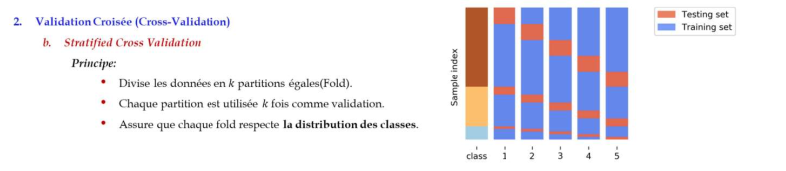

<ipython-input-12-08afb2e1ad9a>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))


Fold 1:
  Class 0: 6 observations
  Class 1: 7 observations
  Class 2: 7 observations

Fold 2:
  Class 0: 7 observations
  Class 1: 6 observations
  Class 2: 7 observations

Fold 3:
  Class 0: 7 observations
  Class 1: 6 observations
  Class 2: 7 observations

Fold 4:
  Class 0: 7 observations
  Class 1: 7 observations
  Class 2: 6 observations

Fold 5:
  Class 0: 7 observations
  Class 1: 7 observations
  Class 2: 6 observations



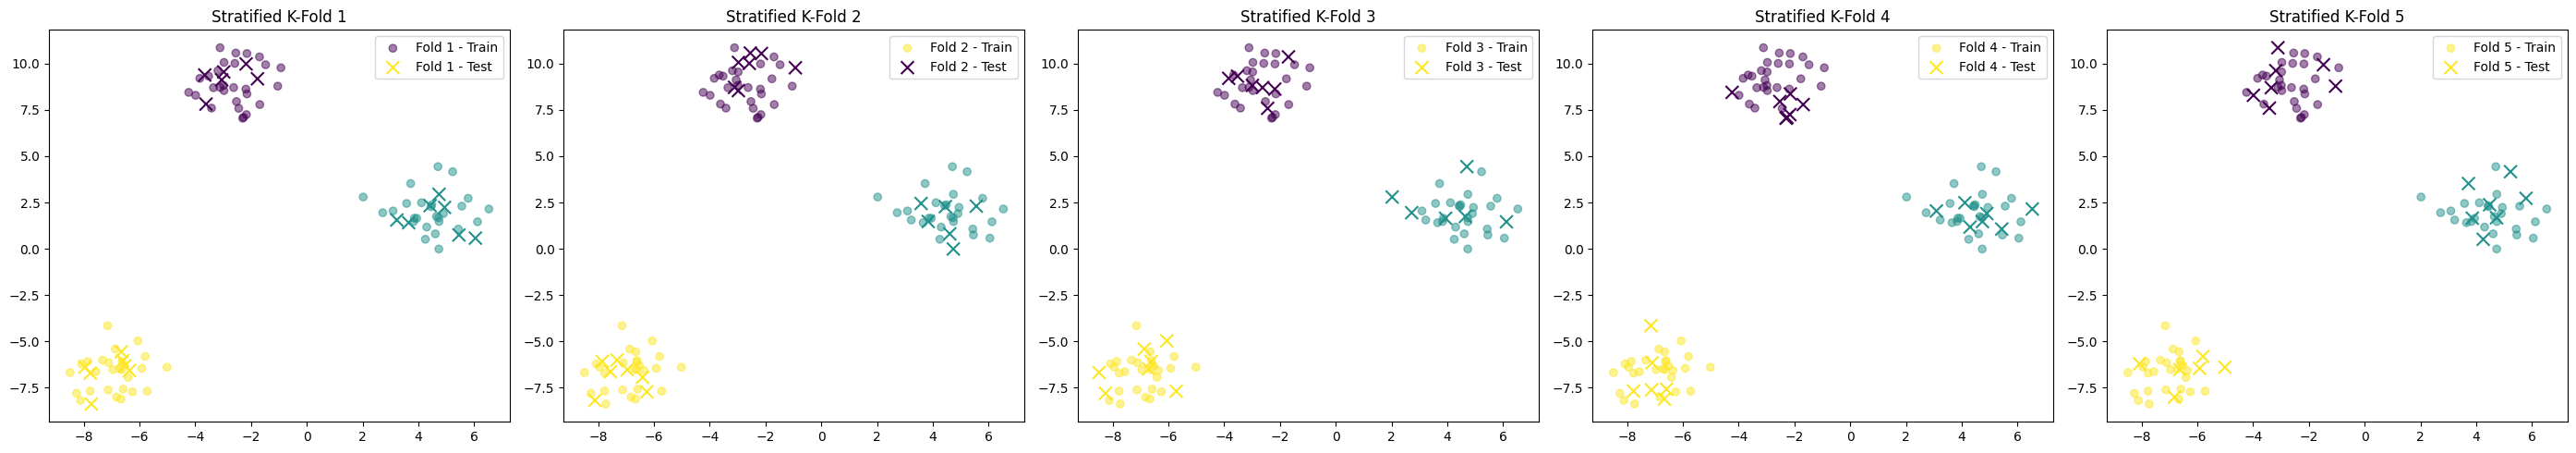

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold

# Générer des données synthétiques
X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Créer les objets de validation croisée
skf = StratifiedKFold(n_splits=5)  # Stratified K-Fold

# Visualiser la répartition des données pour chaque méthode
fig, axes = plt.subplots(1, 5, figsize=(28, 5))

# Configuration pour la colormap
cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))

# Stratified K-Fold
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Tracer les données d'entraînement et de test pour chaque Fold
    axes[i].scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label=f"Fold {i+1} - Train", cmap=cmap, alpha=0.5
    )
    axes[i].scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label=f"Fold {i+1} - Test", cmap=cmap, s=100
    )
    axes[i].set_title(f"Stratified K-Fold {i+1}")
    axes[i].legend()

# Compter le nombre d'observations de test pour chaque classe
unique_classes = np.unique(y)
class_counts_per_fold = []

for train_index, test_index in skf.split(X, y):
    _, y_test = X[test_index], y[test_index]
    class_counts = {cls: np.sum(y_test == cls) for cls in unique_classes}
    class_counts_per_fold.append(class_counts)

# Afficher les informations sur la répartition des classes
for i, counts in enumerate(class_counts_per_fold):
    print(f"Fold {i + 1}:")
    for cls, count in counts.items():
        print(f"  Class {cls}: {count} observations")
    print()

plt.tight_layout()
plt.show()